### ✅ Phase 1: Project Definition and Overview

---

### 🏷️ **Project Title**

**"Student Performance Prediction using ML Pipelines"**

---

### 🗂️ **Jupyter Notebook Filename**

**`student_performance_pipeline.ipynb`**

---

### 📘 **Project Description**

In this project, we aim to predict students’ academic performance based on their educational, social, familial, and economic backgrounds. The goal is to leverage machine learning algorithms to forecast students' final grades, enabling educators and policymakers to take proactive, data-driven interventions for academic improvement.

We'll follow a structured machine learning pipeline, including:

1. **Loading and exploring the dataset**
2. **Cleaning and preprocessing the data**
3. **Building a `Pipeline` for automated data processing**
4. **Training a model using `RandomForestRegressor`**
5. **Tuning hyperparameters with `GridSearchCV`**
6. **Evaluating and visualizing model performance**
7. **Saving the final model for future use**

---

### 💰 **Estimated Project Cost (Upwork Style)**

* **Typical Range:** **\$100 to \$150 USD**
* **With Web API or Frontend:** Up to **\$200 USD**

> Pricing depends on your profile strength, client budget, and the clarity of your proposal.

---

### ⏰ **Estimated Time to Complete**

* **Estimated Duration:** **4–5 days**
* (Assuming a few hours of work per day and no deployment required)

پیشنهاد من: استفاده از دیتاست Student Performance Dataset (UCI)

https://archive.ics.uci.edu/dataset/320/student+performance


In [1]:
import pandas as pd

df = pd.read_csv('dataset/student-mat.csv')

print("Shape of dataset:", df.shape)

df.head()


Shape of dataset: (395, 1)


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [2]:
# Correctly load the CSV with semicolon separator and quoted strings
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# Check the shape
print("Shape of dataset:", df.shape)

# Display first 5 rows
df.head()


Shape of dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Check data types of each column
print("Data types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())


Data types:

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup  

In [6]:
# Get statistical summary for numeric columns
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Number of duplicate rows: 0

Unique values in categorical columns:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


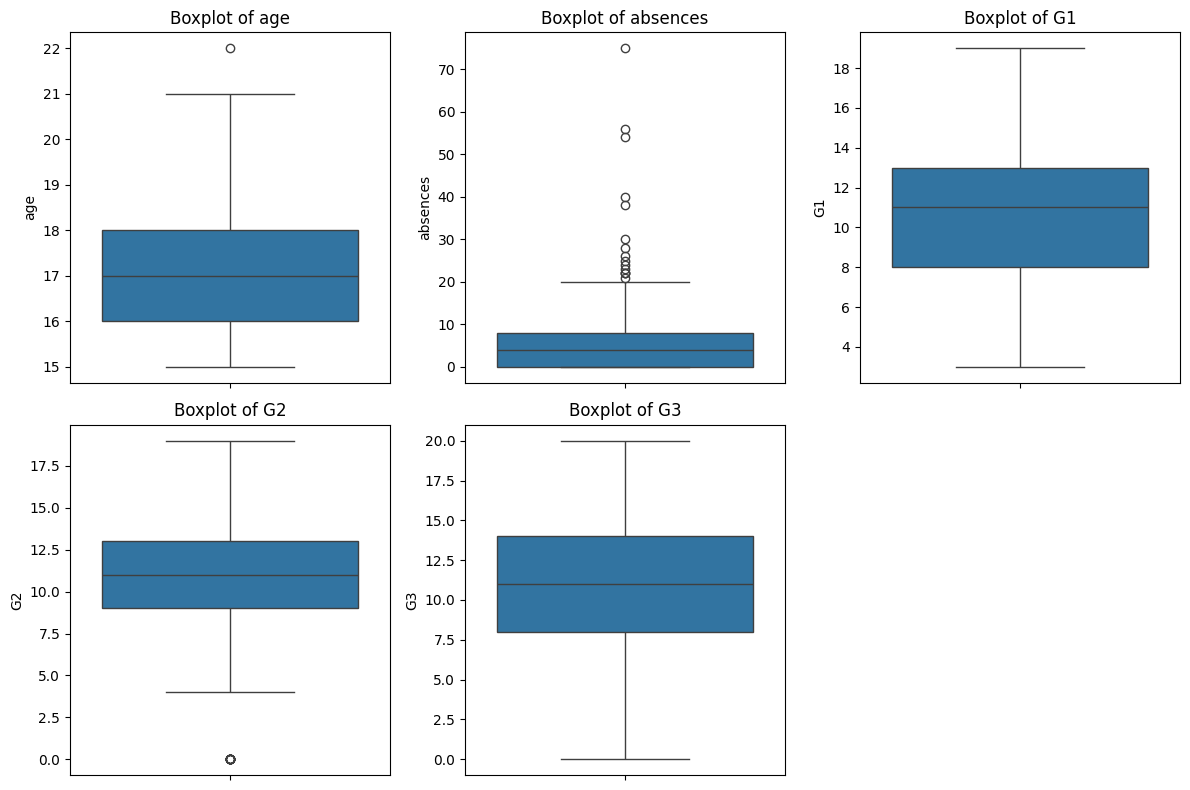

95th percentile for absences: 18.299999999999955
After capping absences:
          absences  absences_capped
count  395.000000       395.000000
mean     5.708861         5.103797
std      8.003096         5.484761
min      0.000000         0.000000
25%      0.000000         0.000000
50%      4.000000         4.000000
75%      8.000000         8.000000
max     75.000000        18.300000


In [7]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# 1. Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# 2. Check unique values in categorical columns to ensure consistency
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                      'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 
                      'internet', 'romantic']

print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# 3. Visualize outliers for key numerical columns
numerical_columns = ['age', 'absences', 'G1', 'G2', 'G3']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 4. Optional: Handle outliers (example: cap absences at 95th percentile)
absences_95th = df['absences'].quantile(0.95)
df['absences_capped'] = df['absences'].clip(upper=absences_95th)
print(f"95th percentile for absences: {absences_95th}")
print("After capping absences:\n", df[['absences', 'absences_capped']].describe())

G3 statistics:
 count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
Number of G3 = 0: 38


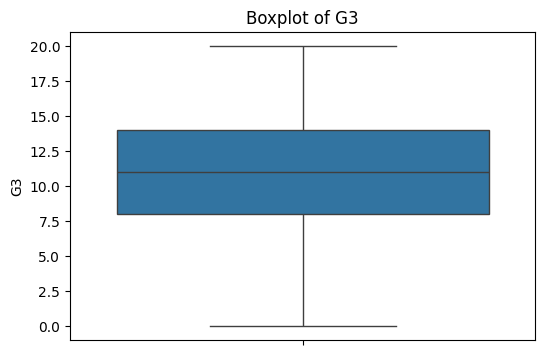

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# Cap absences at 95th percentile
df['absences'] = df['absences'].clip(upper=df['absences'].quantile(0.95))

# Check G3 for outliers
print("G3 statistics:\n", df['G3'].describe())
print("Number of G3 = 0:", (df['G3'] == 0).sum())

# Plot boxplot for G3
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['G3'])
plt.title('Boxplot of G3')
plt.show()